# ======================================================
# AI for Sustainable Development - Week 2 Assignment
# Theme: Machine Learning Meets the UN SDGs 🌍🤖
# SDG 2: Zero Hunger - Predicting Crop Yields
# ======================================================

In [1]:
# -----------------------------
# 0. Install & Import Libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# -----------------------------
# 1. Load Dataset
# -----------------------------
# Replace with your dataset path
data = pd.read_csv("../data/crop_yield.csv")

print("✅ Original Data Sample:")
print(data.head())


✅ Original Data Sample:
   Dist Code  Year  State Code    State Name Dist Name  RICE AREA (1000 ha)  \
0          1  1978          14  Chhattisgarh      Durg                612.5   
1          1  1979          14  Chhattisgarh      Durg                616.8   
2          1  1980          14  Chhattisgarh      Durg                634.9   
3          1  1981          14  Chhattisgarh      Durg                630.0   
4          1  1982          14  Chhattisgarh      Durg                627.9   

   RICE PRODUCTION (1000 tons)  RICE YIELD (Kg per ha)  WHEAT AREA (1000 ha)  \
0                        362.2                  591.35                  48.7   
1                        330.6                  535.99                  44.6   
2                        515.6                  812.10                  44.1   
3                        506.9                  804.60                  41.5   
4                        513.3                  817.49                  41.1   

   WHEAT PRODUCTION 

In [3]:
# -----------------------------
# 2. Reshape into long format
# -----------------------------
long_data = pd.DataFrame({
    "Crop": ["Rice"] * len(data) + ["Wheat"] * len(data) + ["Sugarcane"] * len(data) + ["Cotton"] * len(data),
    "Area": pd.concat([data["RICE AREA (1000 ha)"], data["WHEAT AREA (1000 ha)"],
                       data["SUGARCANE AREA (1000 ha)"], data["COTTON AREA (1000 ha)"]], ignore_index=True),
    "Production": pd.concat([data["RICE PRODUCTION (1000 tons)"], data["WHEAT PRODUCTION (1000 tons)"],
                             data["SUGARCANE PRODUCTION (1000 tons)"], data["COTTON PRODUCTION (1000 tons)"]], ignore_index=True),
    "Yield": pd.concat([data["RICE YIELD (Kg per ha)"], data["WHEAT YIELD (Kg per ha)"],
                        data["SUGARCANE YIELD (Kg per ha)"], data["COTTON YIELD (Kg per ha)"]], ignore_index=True)
})

print("\n📊 Reshaped Data (long format):")
print(long_data.head(12))


📊 Reshaped Data (long format):
    Crop   Area  Production    Yield
0   Rice  612.5       362.2   591.35
1   Rice  616.8       330.6   535.99
2   Rice  634.9       515.6   812.10
3   Rice  630.0       506.9   804.60
4   Rice  627.9       513.3   817.49
5   Rice  626.7       711.0  1134.51
6   Rice  632.2       563.8   891.81
7   Rice  630.8       699.8  1109.38
8   Rice  643.0       525.0   816.49
9   Rice  648.0       523.0   807.10
10  Rice  652.7       549.7   842.19
11  Rice  660.2       457.3   692.67


In [4]:
# -----------------------------
# 3. Define Features & Target
# -----------------------------
X = long_data[["Crop", "Area", "Production"]]
y = long_data["Yield"]


In [5]:
# -----------------------------
# 4. Encode Categorical + Model Pipeline
# -----------------------------
categorical_features = ["Crop"]
numeric_features = ["Area", "Production"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(), categorical_features),
        ("num", "passthrough", numeric_features)
    ]
)

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])


In [6]:
# -----------------------------
# 5. Train/Test Split & Train
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [7]:
# -----------------------------
# 6. Evaluate Model
# -----------------------------
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📈 Generalized Multi-Crop Model Performance:")
print(f" - Mean Squared Error: {mse:.2f}")
print(f" - R² Score: {r2:.2f}")


📈 Generalized Multi-Crop Model Performance:
 - Mean Squared Error: 2829769.39
 - R² Score: 0.54


In [8]:
# -----------------------------
# 7. Example Predictions
# -----------------------------
example = pd.DataFrame({
    "Crop": ["Rice", "Wheat", "Sugarcane", "Cotton"],
    "Area": [600, 50, 10, 5],
    "Production": [350, 25, 200, 1]
})

predictions = model.predict(example)
example["Predicted Yield (Kg/ha)"] = predictions

print("\n🌾 Example Predictions:")
print(example)


🌾 Example Predictions:
        Crop  Area  Production  Predicted Yield (Kg/ha)
0       Rice   600         350                90.322436
1      Wheat    50          25              1156.207599
2  Sugarcane    10         200              5030.677327
3     Cotton     5           1               210.542741


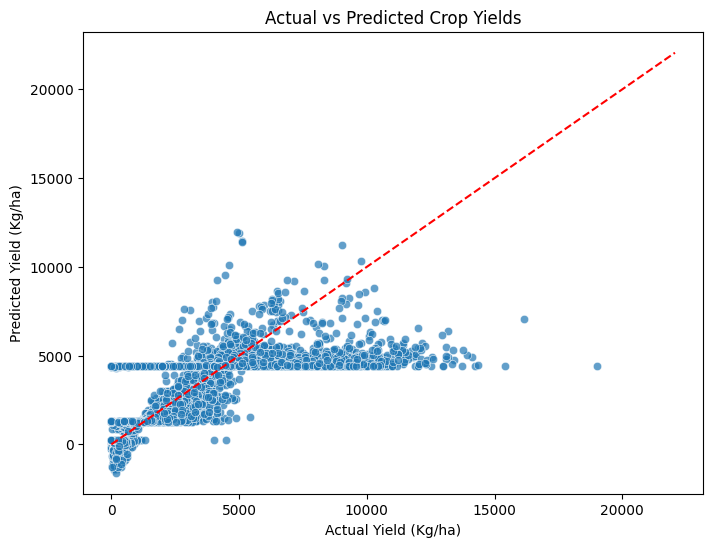

In [9]:
# -----------------------------
# 8. Visualization - Actual vs Predicted
# -----------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # diagonal line
plt.xlabel("Actual Yield (Kg/ha)")
plt.ylabel("Predicted Yield (Kg/ha)")
plt.title("Actual vs Predicted Crop Yields")
plt.show()

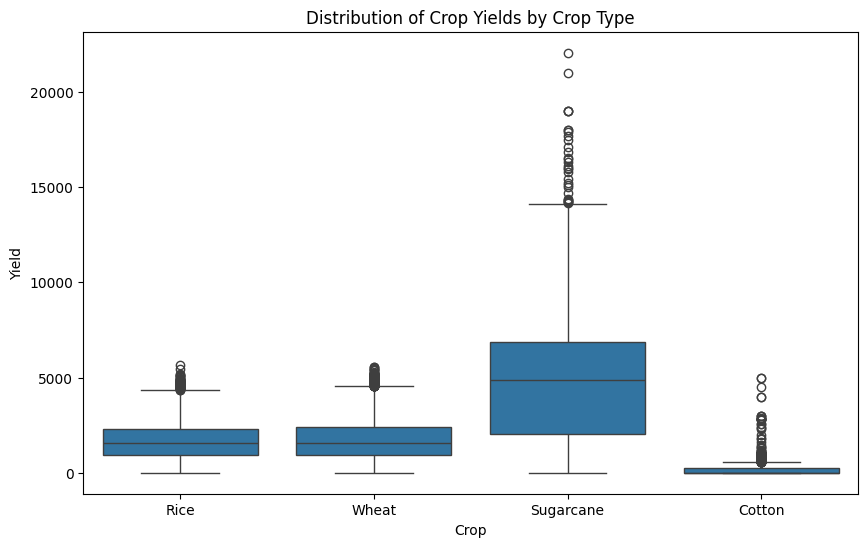

In [10]:
# -----------------------------
# 9. Visualization - Distribution by Crop
# -----------------------------
plt.figure(figsize=(10,6))
sns.boxplot(data=long_data, x="Crop", y="Yield")
plt.title("Distribution of Crop Yields by Crop Type")
plt.show()